In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
term_freq_df = pd.read_csv('term_freq_data.csv')

In [9]:
term_freq_df.rename(columns = {'Unnamed: 0':'word'}, inplace = True) 

In [10]:
term_freq_df.head()

,word,negative,positive,total
0,aa,168,97,265
1,aaa,97,55,152
2,aaaa,45,29,74
3,aaaaa,26,12,38
4,aaaaaa,16,12,28


In [11]:
df = term_freq_df.sort_values(by='total', ascending=False)
df = df.reset_index(drop=True)

In [12]:
df.head()

,word,negative,positive,total
0,to,313185,252600,565785
1,the,257953,266161,524114
2,my,190805,125981,316786
3,it,157491,147841,305332
4,and,153985,149692,303677


Text(0.5, 1.0, 'Top 500 tokens in tweets')

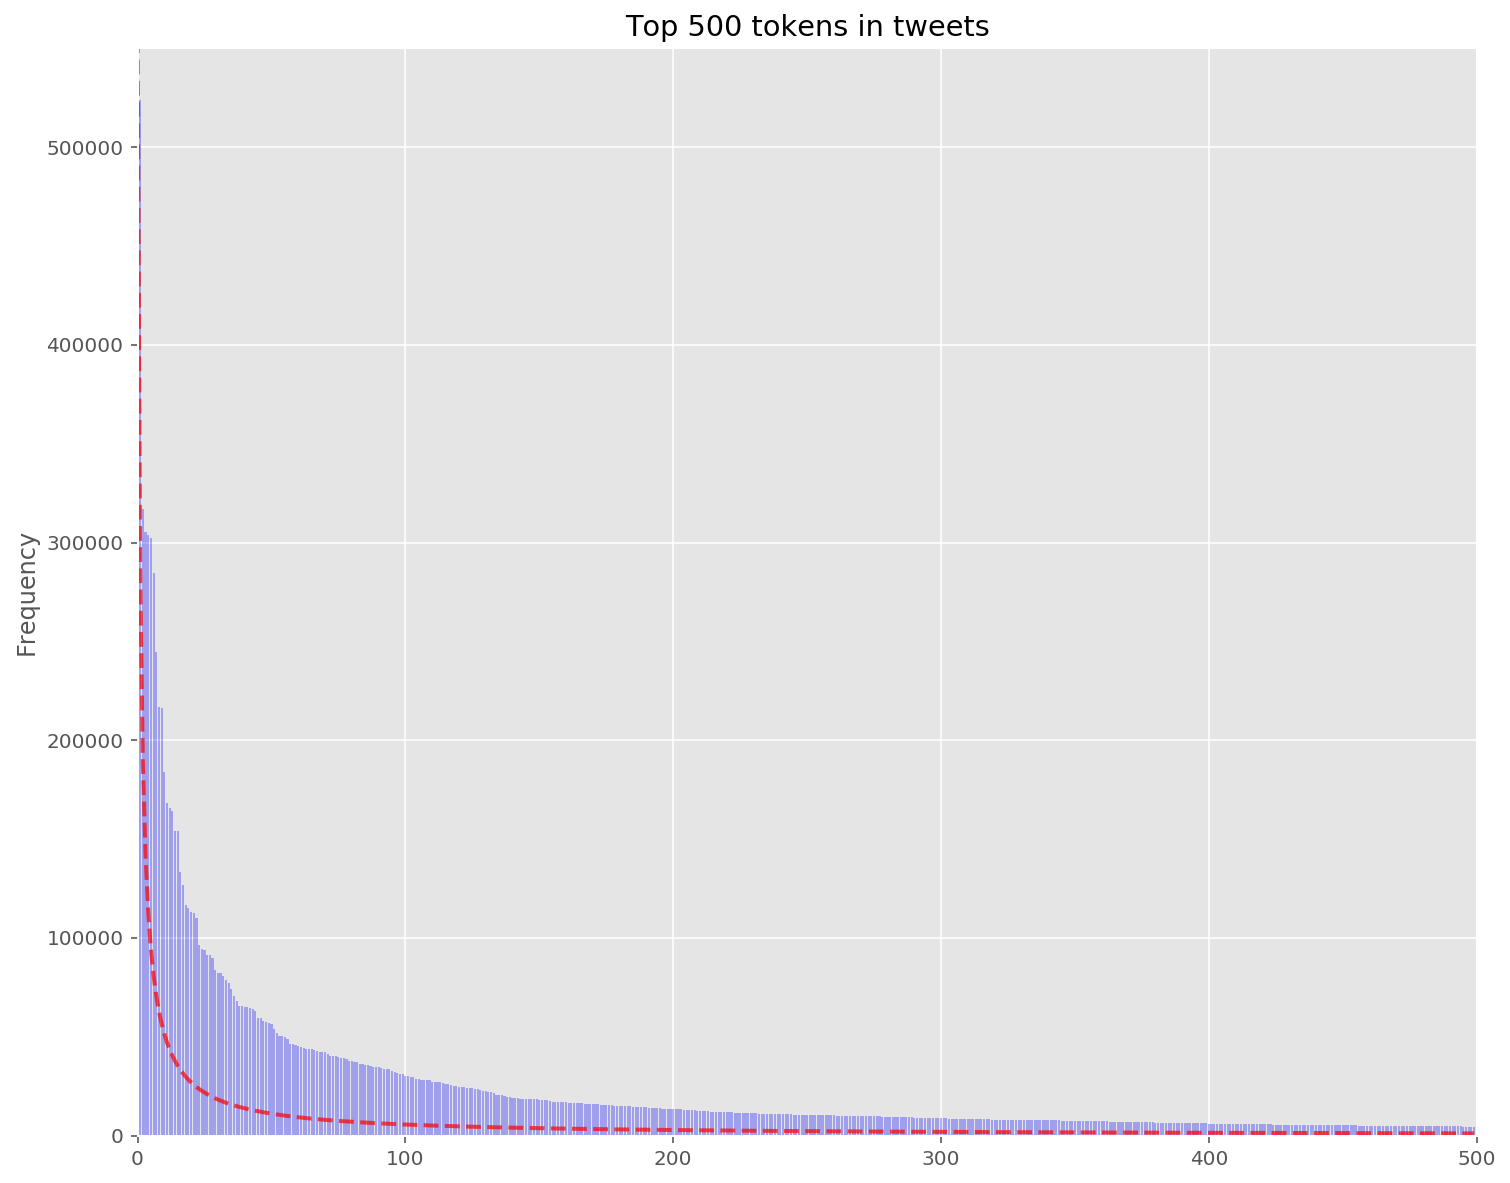

In [13]:
plt.style.use('ggplot')
y_pos = np.arange(500)
plt.figure(figsize=(12,10))
expected_zipf = [df['total'][0]/(i+1) for i in y_pos]
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.7)
plt.bar(y_pos, df['total'][:500],alpha=0.3, color='blue')
plt.xlim(0,500)
plt.ylim(0, 550000)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

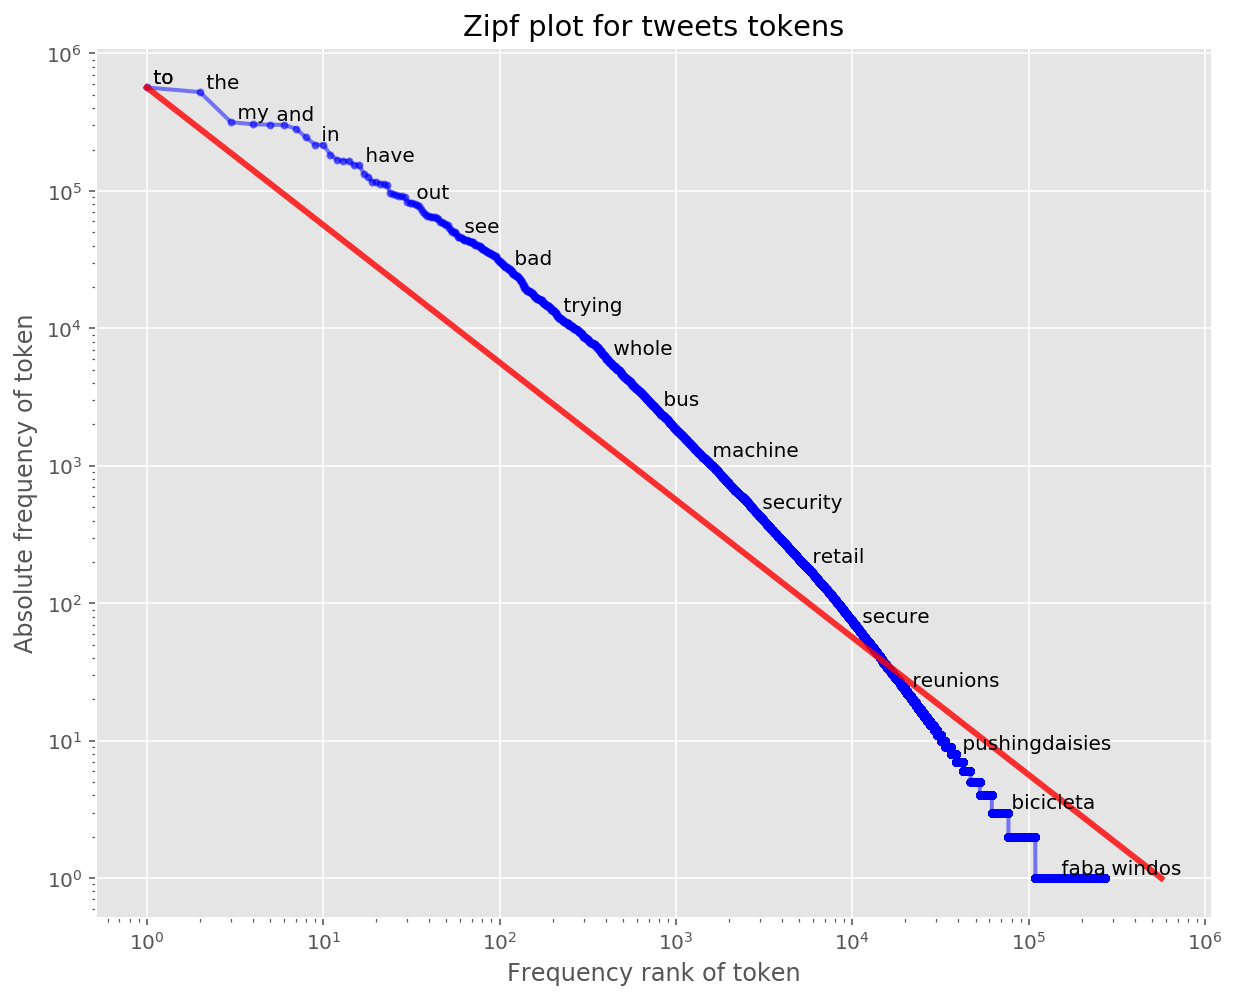

In [14]:
plt.style.use('ggplot')
counts = df['total']
tokens = df['word']
ranks = np.arange(1, len(counts)+1)
indices = np.argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,8))
plt.loglog(ranks, frequencies, marker=".", color='b', linewidth=2, alpha=0.5)
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r', linewidth=3, alpha=0.8)
plt.title("Zipf plot for tweets tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
for n in list(np.logspace(-0.5, np.log10(len(counts)-2), 22).astype(int)):
    dummy = plt.text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom", horizontalalignment="left")

In [15]:
df = pd.read_csv('clean_tweets.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [16]:

from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vect = CountVectorizer(stop_words='english', max_features=10000)

In [18]:
vect.fit(df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [19]:
neg_matrix = vect.transform(df[df.sentiment==0].text)
pos_matrix = vect.transform(df[df.sentiment==1].text)

In [20]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [21]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [23]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [24]:
term_freq_df.head()

,0,1
aa,168,97
aaa,97,55
aaaa,45,29
aaaah,76,61
aaah,160,143


In [26]:
len(term_freq_df)

10000

In [27]:
term_freq_df.columns = ['negative', 'positive']

In [28]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [29]:
term_freq_df.head()

,negative,positive,total
aa,168,97,265
aaa,97,55,152
aaaa,45,29,74
aaaah,76,61,137
aaah,160,143,303


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

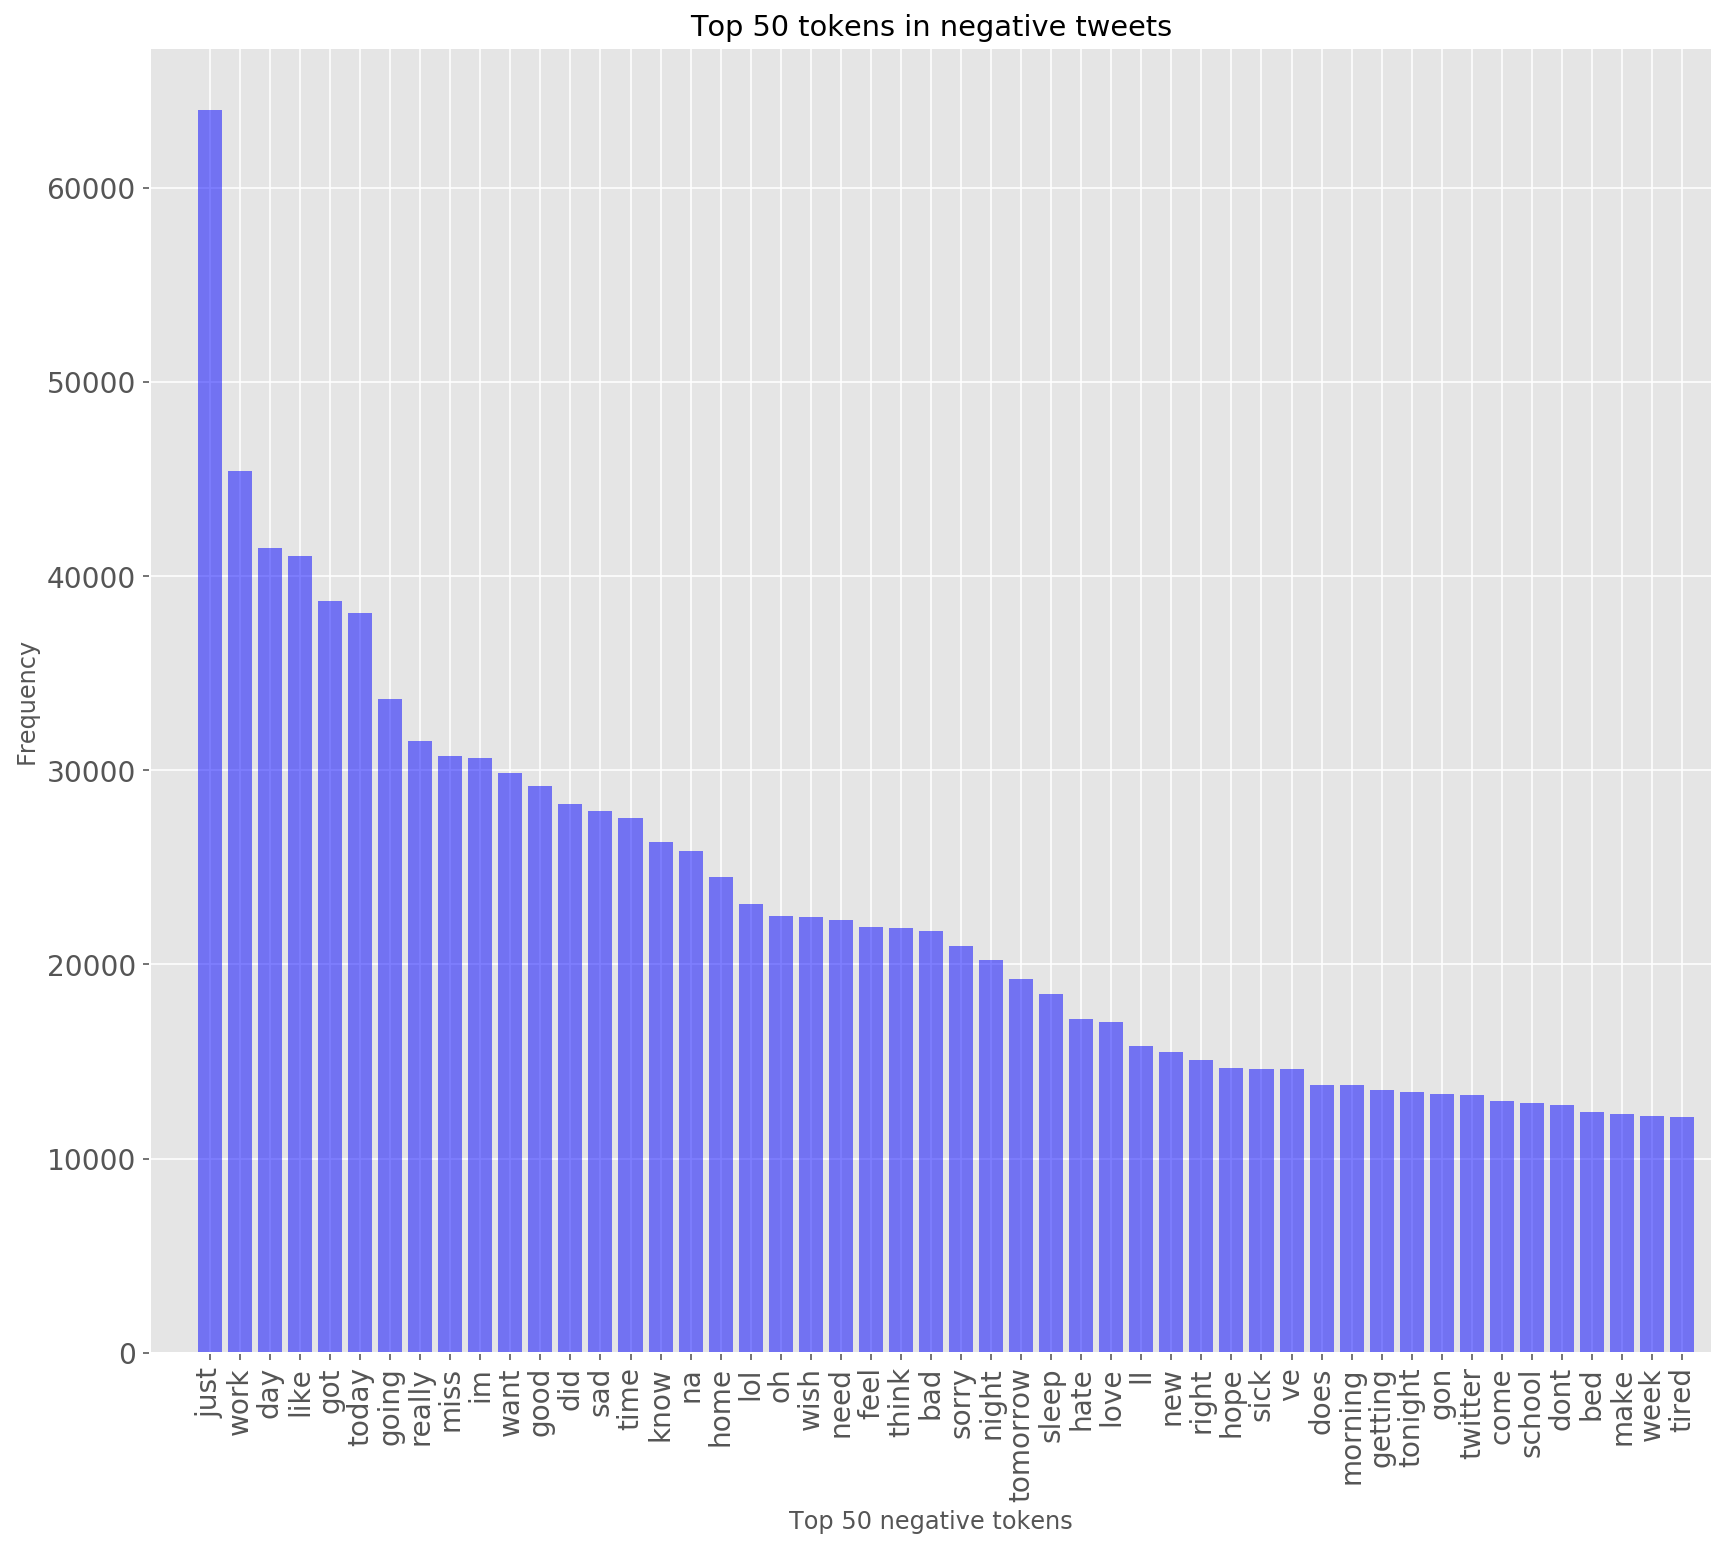

In [30]:
plt.style.use('ggplot')
neg_df = term_freq_df.sort_values(by='negative', ascending=False)
y_pos = np.arange(50)
plt.figure(figsize=(14,12))
plt.bar(y_pos, neg_df['negative'][:50],alpha=0.5, color='blue', align='center')
plt.xlim(-2,50)
plt.xticks(y_pos, neg_df['negative'][:50].index, rotation = 'vertical')
plt.tick_params(labelsize=14)
plt.xlabel('Top 50 negative tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

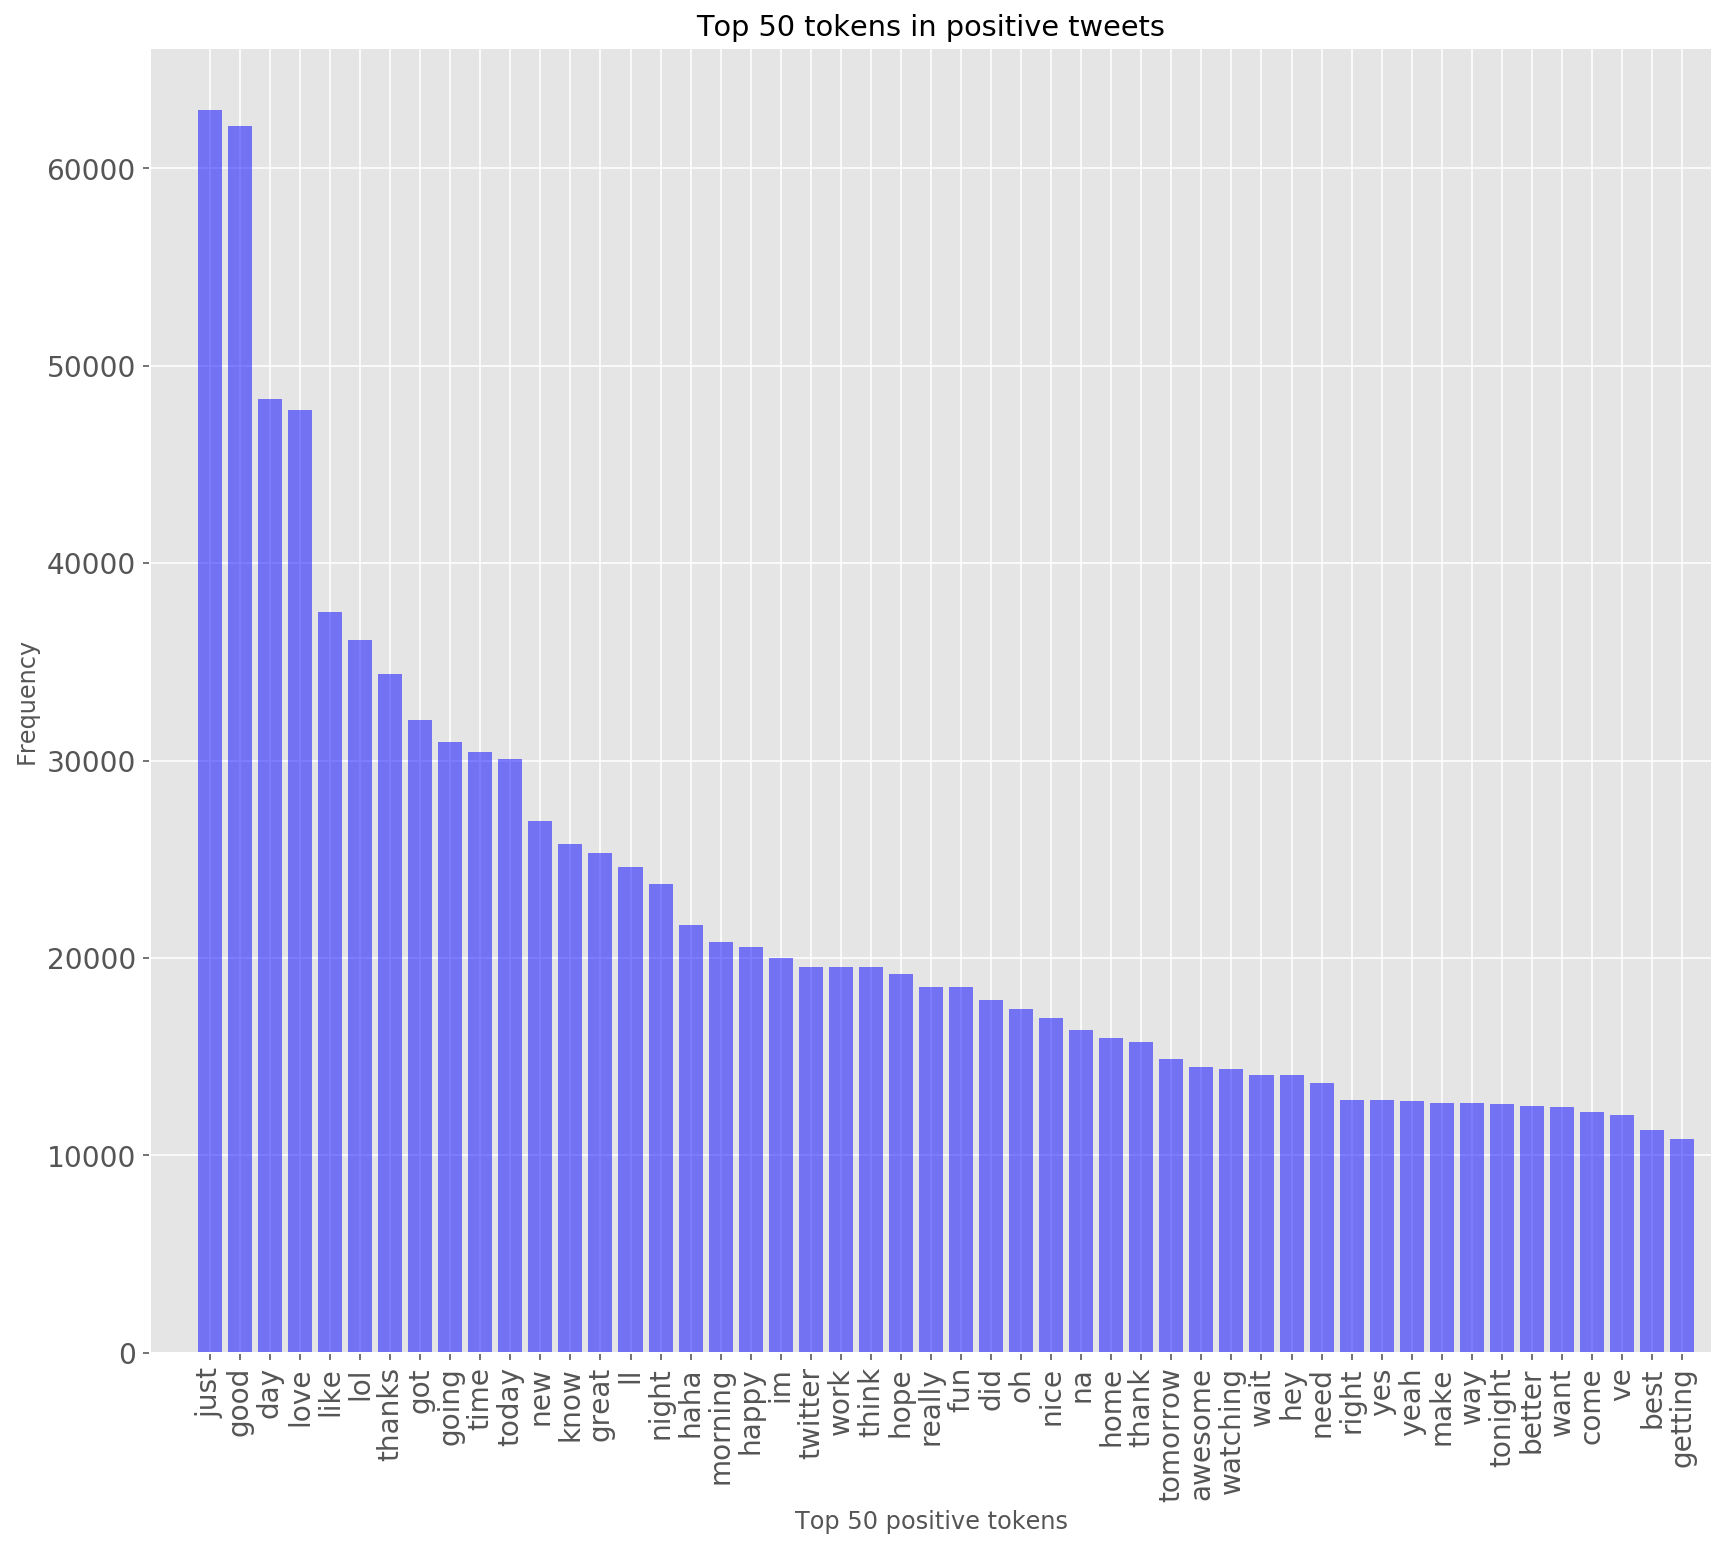

In [31]:
plt.style.use('ggplot')
pos_df = term_freq_df.sort_values(by='positive', ascending=False)
y_pos = np.arange(50)
plt.figure(figsize=(14,12))
plt.bar(y_pos, pos_df['positive'][:50],alpha=0.5, color='blue', align='center')
plt.xlim(-2,50)
plt.xticks(y_pos, pos_df['positive'][:50].index, rotation = 'vertical')
plt.tick_params(labelsize=14)
plt.xlabel('Top 50 positive tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in positive tweets')


Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

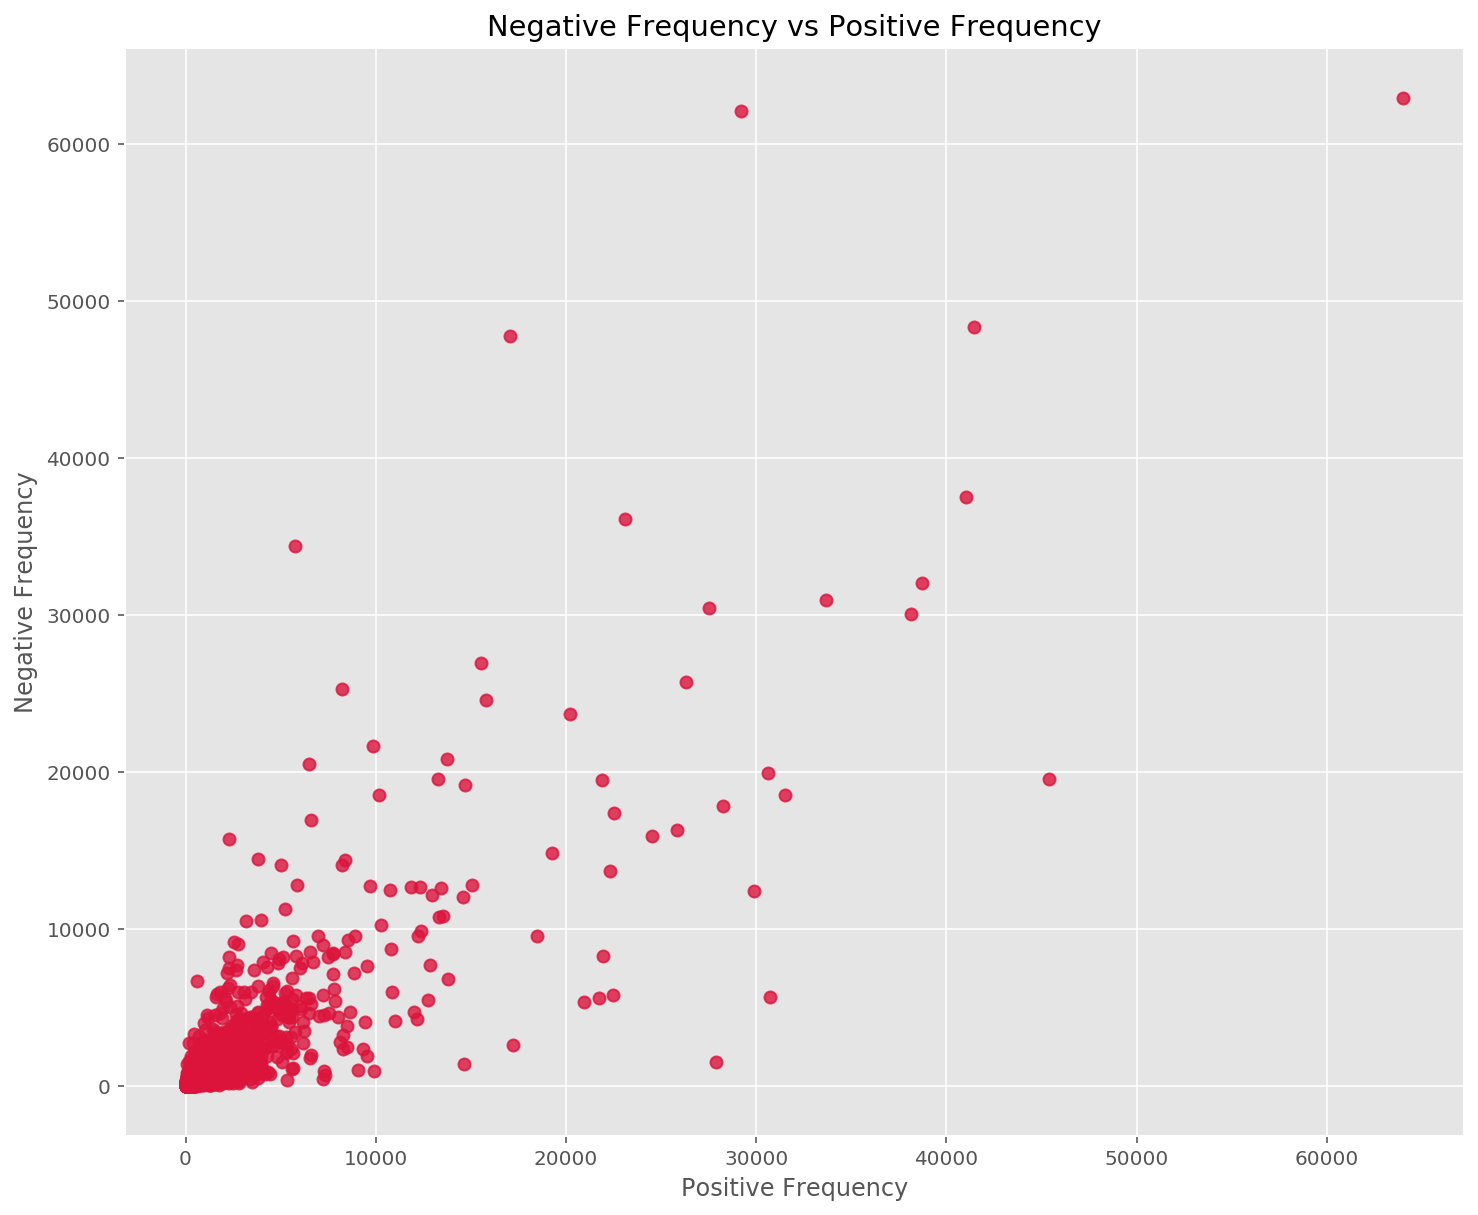

In [32]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='negative', y='positive', data=term_freq_df, fit_reg=False, color='crimson')
plt.ylabel("Negative Frequency")
plt.xlabel("Positive Frequency")
plt.title("Negative Frequency vs Positive Frequency")

In [33]:
term_freq_df['posrate'] = term_freq_df['positive']/term_freq_df['total']

In [34]:
term_freq_df.sort_values(by='posrate', ascending=False).head(10)

,negative,positive,total,posrate
mileymonday,0,161,161,1.000000
dividends,0,83,83,1.000000
emailunlimited,0,100,100,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989


In [35]:
#Words with highest posrate have 0 frequency in negative class. But the frequency of these words is quite low to use them as a measure to characterise positive tweets.

#Another metric is the frequency a word occurs in the class. This is defined as

##$$
#posfreq = \frac{positive frequency}{Σpositive frequency}
#$$

In [36]:
term_freq_df['posfreq'] = term_freq_df['positive']/term_freq_df['positive'].sum()

In [37]:
term_freq_df.sort_values(by='posfreq', ascending=False).head(10)

,negative,positive,total,posrate,posfreq
just,64006,62946,126952,0.495825,0.014264
good,29213,62122,91335,0.680155,0.014077
day,41456,48319,89775,0.538223,0.010950
love,17061,47780,64841,0.736879,0.010827
like,41052,37527,78579,0.477570,0.008504
lol,23123,36120,59243,0.609692,0.008185
thanks,5768,34378,40146,0.856324,0.007790
got,38715,32030,70745,0.452753,0.007258
going,33690,30939,64629,0.478717,0.007011
time,27532,30438,57970,0.525065,0.006898


In [38]:
term_freq_df['posfreq'].max()

0.014264137859926102

In [39]:
term_freq_df['posfreq'].min()

0.0

In [41]:
term_freq_df['posrate'].max()

1.0

In [42]:
#hormonic for simplicity

In [44]:

from scipy import stats

In [45]:
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['posrate'], x['posfreq']])
                                          if x['posrate']>0 and x['posfreq']>0 else 0), axis=1)

In [46]:
term_freq_df.sort_values(by='pos_hmean', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean
just,64006,62946,126952,0.495825,0.014264,0.027731
good,29213,62122,91335,0.680155,0.014077,0.027584
day,41456,48319,89775,0.538223,0.010950,0.021462
love,17061,47780,64841,0.736879,0.010827,0.021341
like,41052,37527,78579,0.477570,0.008504,0.016710
lol,23123,36120,59243,0.609692,0.008185,0.016153
thanks,5768,34378,40146,0.856324,0.007790,0.015440
got,38715,32030,70745,0.452753,0.007258,0.014288
going,33690,30939,64629,0.478717,0.007011,0.013820
time,27532,30438,57970,0.525065,0.006898,0.013616


In [47]:
#cdf of harmonic distribution

In [48]:
def normcdf(x):
    return stats.norm.cdf(x, x.mean(), x.std()) 

In [49]:
term_freq_df['posrate_cdf'] = normcdf(term_freq_df['posrate'])

In [50]:
term_freq_df['posfreq_cdf'] = normcdf(term_freq_df['posfreq'])

In [51]:
term_freq_df['pos_hmean_cdf'] = stats.hmean([term_freq_df['posrate_cdf'], term_freq_df['posfreq_cdf']])

In [52]:
term_freq_df.sort_values(by='pos_hmean_cdf', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf
welcome,620,6702,7322,0.915324,0.001519,0.003032,0.995735,0.999312,0.997520
thank,2282,15737,18019,0.873356,0.003566,0.007103,0.990968,1.000000,0.995464
thanks,5768,34378,40146,0.856324,0.007790,0.015440,0.987976,1.000000,0.993951
awesome,3829,14475,18304,0.790811,0.003280,0.006533,0.967193,1.000000,0.983323
glad,2273,8255,10528,0.784100,0.001871,0.003732,0.963952,0.999967,0.981629
follow,2553,9154,11707,0.781925,0.002074,0.004138,0.962847,0.999996,0.981070
enjoy,1642,5876,7518,0.781591,0.001332,0.002659,0.962675,0.997262,0.979663
sweet,1621,5653,7274,0.777151,0.001281,0.002558,0.960325,0.996135,0.977902
yay,3171,10508,13679,0.768185,0.002381,0.004748,0.955211,1.000000,0.977092
hi,2176,7219,9395,0.768387,0.001636,0.003265,0.955332,0.999734,0.977029


In [53]:
term_freq_df['negrate'] = term_freq_df['negative']/term_freq_df['total']
term_freq_df['negfreq'] = term_freq_df['negative']/term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['negrate'], x['negfreq']])
                                          if x['negrate']>0 and x['negfreq']>0 else 0), axis=1)


In [54]:
term_freq_df['negrate_cdf'] = normcdf(term_freq_df['negrate'])
term_freq_df['negfreq_cdf'] = normcdf(term_freq_df['negfreq'])
term_freq_df['neg_hmean_cdf'] = stats.hmean([term_freq_df['negrate_cdf'], term_freq_df['negfreq_cdf']])

In [55]:
term_freq_df.sort_values(by='neg_hmean_cdf', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf,negrate,negfreq,neg_hmean,negrate_cdf,negfreq_cdf,neg_hmean_cdf
sad,27911,1510,29421,0.051324,0.000342,0.000680,0.002210,0.707536,0.004406,0.948676,0.006038,0.012000,0.997790,1.000000,0.998894
hurts,7204,456,7660,0.059530,0.000103,0.000206,0.002599,0.503000,0.005171,0.940470,0.001558,0.003112,0.997401,0.999690,0.998544
sick,14620,1420,16040,0.088529,0.000322,0.000641,0.004518,0.691534,0.008976,0.911471,0.003163,0.006304,0.995482,1.000000,0.997736
sucks,9902,982,10884,0.090224,0.000223,0.000444,0.004662,0.608860,0.009252,0.909776,0.002142,0.004274,0.995338,0.999999,0.997663
poor,7333,719,8052,0.089295,0.000163,0.000325,0.004582,0.556434,0.009089,0.910705,0.001586,0.003167,0.995418,0.999757,0.997583
ugh,9056,1000,10056,0.099443,0.000227,0.000452,0.005518,0.612388,0.010938,0.900557,0.001959,0.003910,0.994482,0.999994,0.997230
missing,7282,991,8273,0.119787,0.000225,0.000448,0.007920,0.610625,0.015638,0.880213,0.001575,0.003145,0.992080,0.999732,0.995891
hate,17208,2618,19826,0.132049,0.000593,0.001181,0.009776,0.867034,0.019333,0.867951,0.003723,0.007414,0.990224,1.000000,0.995088
headache,5317,421,5738,0.073371,0.000095,0.000191,0.003397,0.495863,0.006747,0.926629,0.001150,0.002298,0.996603,0.993145,0.994871
miss,30737,5710,36447,0.156666,0.001294,0.002567,0.014673,0.996457,0.028921,0.843334,0.006649,0.013195,0.985327,1.000000,0.992609


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

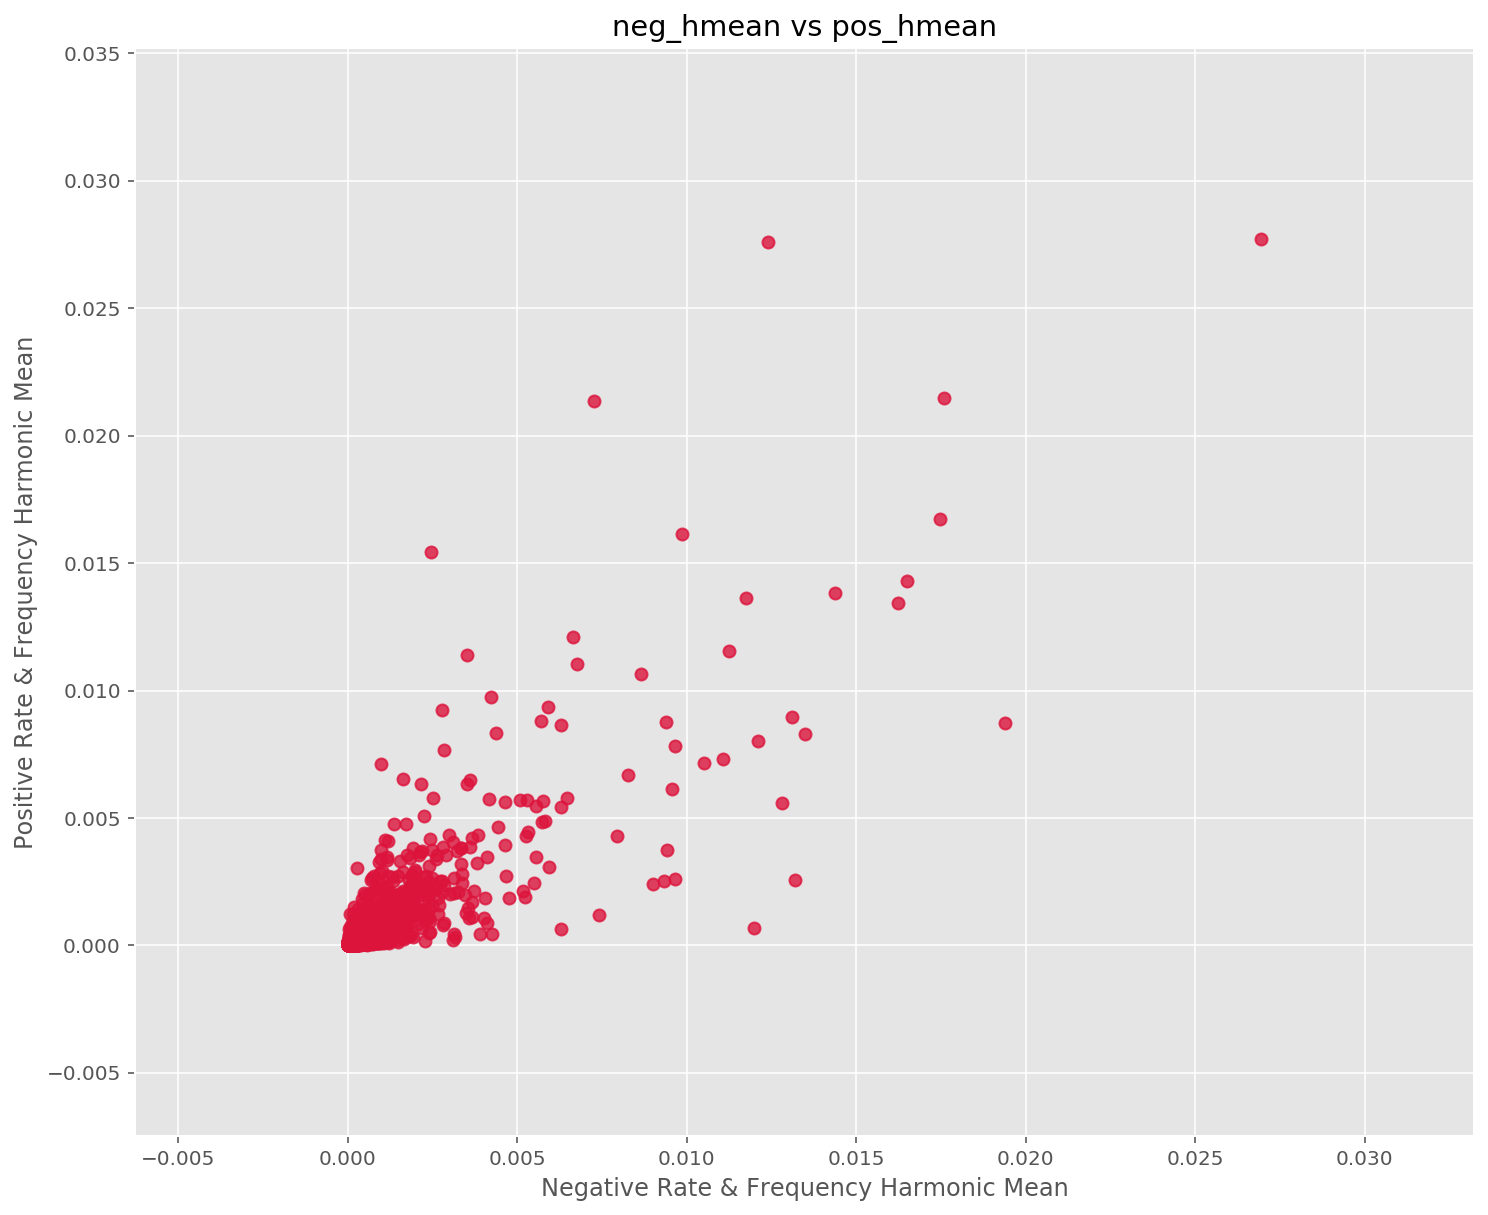

In [56]:
#Plotting pos_hmean (Y-axis) vs neg_hmean (X-axis):

plt.figure(figsize=(12,10))
ax = sns.regplot(x='neg_hmean', y='pos_hmean', data=term_freq_df, fit_reg=False, color='crimson')
plt.ylabel("Positive Rate & Frequency Harmonic Mean")
plt.xlabel("Negative Rate & Frequency Harmonic Mean")
plt.title("neg_hmean vs pos_hmean")

Text(0.5, 1.0, 'neg_hmean_cdf vs pos_hmean_cdf')

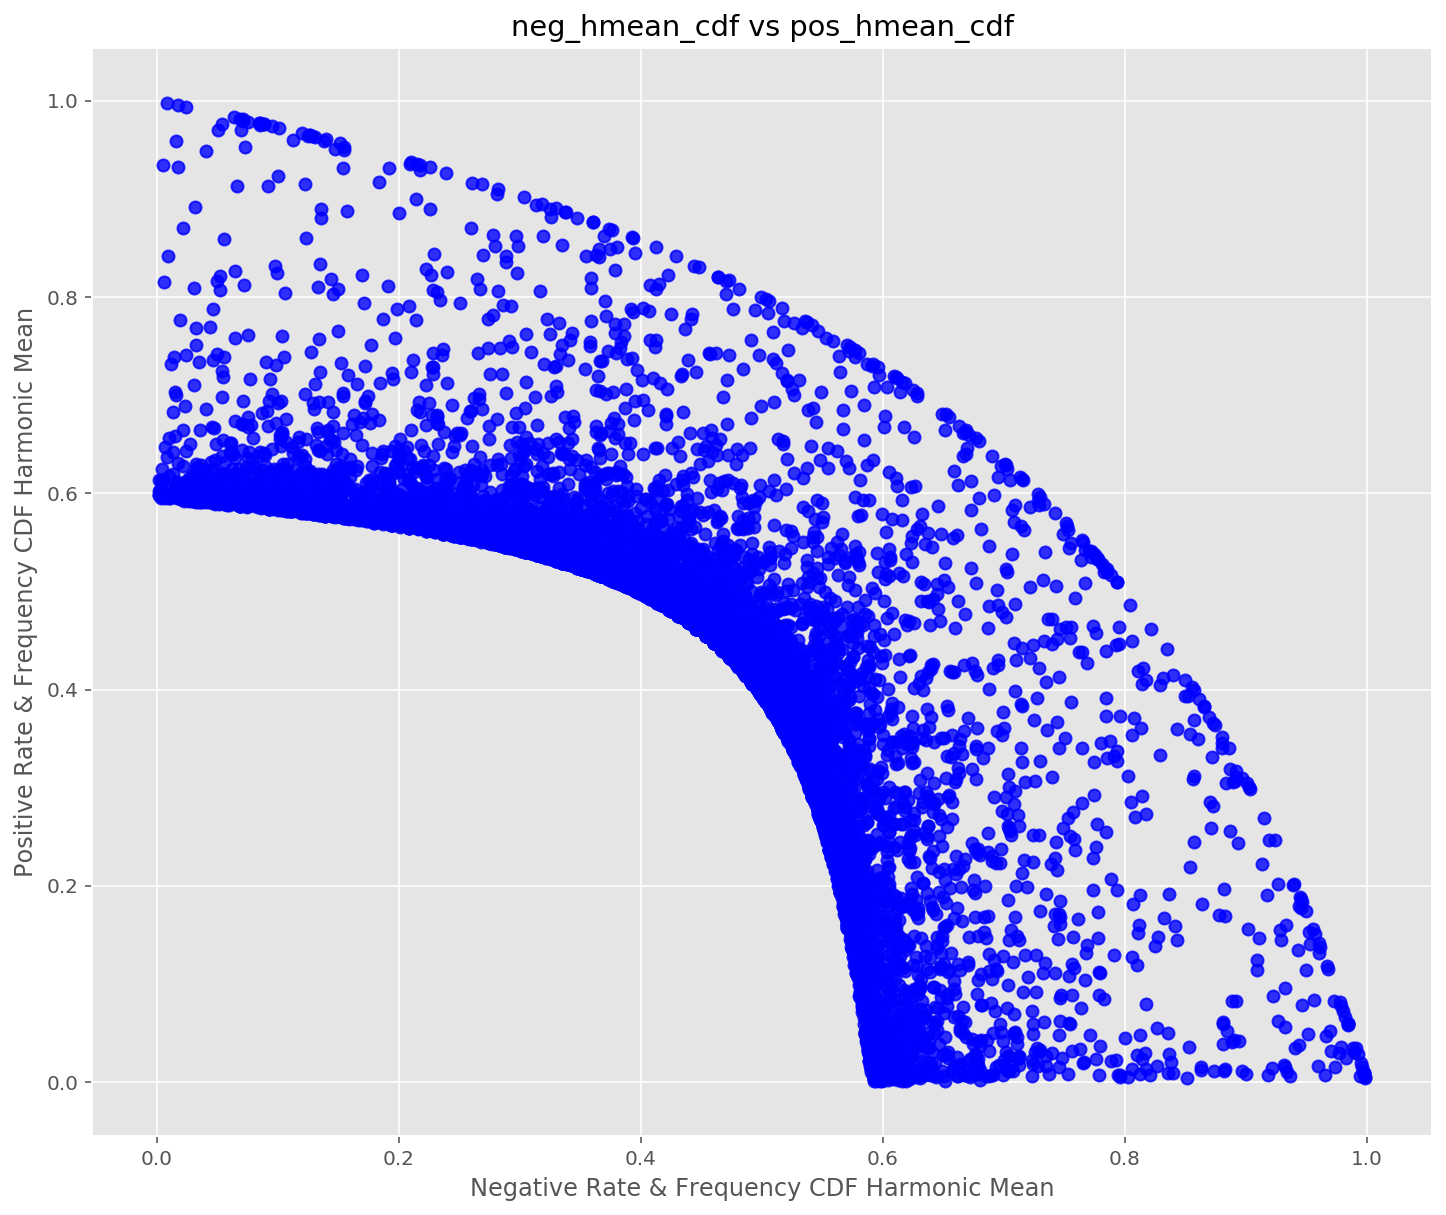

In [58]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='neg_hmean_cdf', y='pos_hmean_cdf', data=term_freq_df, fit_reg=False, color='blue')
plt.ylabel("Positive Rate & Frequency CDF Harmonic Mean")
plt.xlabel("Negative Rate & Frequency CDF Harmonic Mean")
plt.title("neg_hmean_cdf vs pos_hmean_cdf")